In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_recall_curve, auc
import numpy as np

data_dir = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)),'data')
results_dir = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)),'Results_external')

df_GCN = pd.read_csv(os.path.join(results_dir,'GCN_output.csv'),header=0)
df_TML = pd.read_csv(os.path.join(results_dir,'TML_output.csv'),header=0)
df_gt = pd.read_csv(os.path.join(results_dir,'external_set.csv'),header=0, index_col=0)

In [2]:
df_gt['Check AD'] = df_GCN['Check AD'].to_list()
df_GCN.index = df_gt.index
df_TML.index = df_gt.index
df_GCN = df_GCN[df_GCN['Check AD'] == True]
df_TML = df_TML[df_TML['Check AD'] == True]
df_gt = df_gt[df_gt['Check AD'] == True]
df_gt.drop(columns=['SMILES'], inplace=True)
df_GCN.drop(columns=['Check AD'], inplace=True)
df_TML.drop(columns=['Check AD'], inplace=True)
df_GCN.drop(columns=['Standardized SMILES'], inplace=True)
df_TML.drop(columns=['Standardized SMILES'], inplace=True)
df_TML.drop(columns=['Unnamed: 0'], inplace=True)
df_gt.drop(columns=['Check AD'], inplace=True)

In [6]:
pairs_df = pd.melt(df_gt.assign(ligand=df_gt.index), id_vars='ligand', var_name='receptor', value_name='association')
nan_indexes = pairs_df[pairs_df['association'].isna()].index.tolist()
pairs_df_GCN = pd.melt(df_GCN.assign(ligand=df_GCN.index), id_vars='ligand', var_name='receptor', value_name='association')
pairs_df_TML = pd.melt(df_TML.assign(ligand=df_TML.index), id_vars='ligand', var_name='receptor', value_name='association')
pairs_df = pairs_df.dropna(axis=0, how='any')
pairs_df_GCN.drop(index=nan_indexes, inplace=True)
pairs_df_TML.drop(index=nan_indexes, inplace=True)

In [9]:
pairs_df['association'] = pairs_df['association'].astype(int)
pairs_df_GCN['class'] = [0 if x<0.5 else 1 for x in pairs_df_GCN['association'].to_list()]
pairs_df_TML['class'] = [0 if x<0.5 else 1 for x in pairs_df_TML['association'].to_list()]

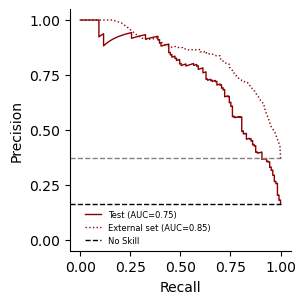

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8/2.54,8/2.54),sharex=True,sharey=True)

tml_y_true = pairs_df['association'].to_numpy()
tml_y_prob = pairs_df_TML['association'].to_numpy()
tml_precision, tml_recall, _ = precision_recall_curve(tml_y_true,tml_y_prob)
tml_auc_val = auc(tml_recall,tml_precision)
ax.plot(tml_recall,tml_precision,label=f'External set (AUC={tml_auc_val:.2f})',color='darkred')
ax.plot([-0.05,1], [tml_precision[0],tml_precision[0]],linestyle='--',color='black')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xticks(np.arange(0,1.25,0.25))
ax.set_yticks(np.arange(0,1.25,0.25))
ax.legend(loc=(0.05,0.01),frameon=False, prop={'size': 6})
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()

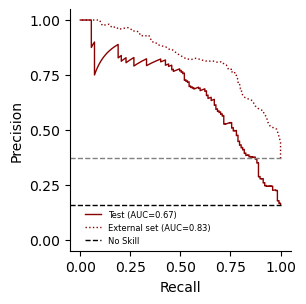

In [13]:
fig, ax = plt.subplots(1,1,figsize=(8/2.54,8/2.54),sharex=True,sharey=True)

gcn_y_true = pairs_df['association'].to_numpy()
gcn_y_prob = pairs_df_GCN['association'].to_numpy()
gcn_precision, gcn_recall, _ = precision_recall_curve(gcn_y_true,gcn_y_prob)
gcn_auc_val = auc(gcn_recall,gcn_precision)
ax.plot(gcn_recall,gcn_precision,label=f'External set (AUC={gcn_auc_val:.2f})',color='darkred')
ax.plot([-0.05,1], [gcn_precision[0],gcn_precision[0]],linestyle='black',color='gray')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xticks(np.arange(0,1.25,0.25))
ax.set_yticks(np.arange(0,1.25,0.25))
ax.legend(loc=(0.05,0.01),frameon=False, prop={'size': 6})
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()

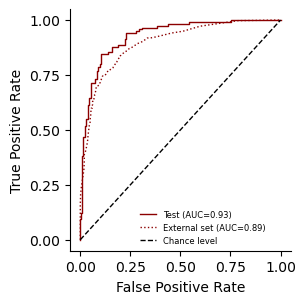

In [14]:
from sklearn.metrics import roc_curve, auc
fig, ax = plt.subplots(1,1,figsize=(8/2.54,8/2.54),sharex=True,sharey=True)

tml_y_true = pairs_df['association'].to_numpy()
tml_y_prob = pairs_df_TML['association'].to_numpy()
tml_fpr, tml_tpr, _ = roc_curve(tml_y_true,tml_y_prob)
tml_auc_val = auc(tml_fpr,tml_tpr)
ax.plot(tml_fpr,tml_tpr,label=f'External set (AUC={tml_auc_val:.2f})',color='darkred')

plt.plot([0, 1], [0, 1], linestyle="--", color="black", label="Chance level")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xticks(np.arange(0,1.25,0.25))
ax.set_yticks(np.arange(0,1.25,0.25))
ax.legend(loc=(0.3,0.01),frameon=False, prop={'size': 6})
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()

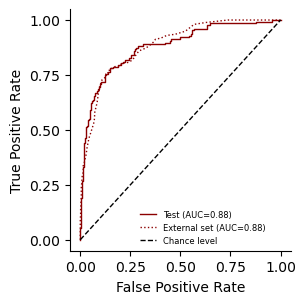

In [15]:
fig, ax = plt.subplots(1,1,figsize=(8/2.54,8/2.54),sharex=True,sharey=True)

gcn_y_true = pairs_df['association'].to_numpy()
gcn_y_prob = pairs_df_GCN['association'].to_numpy()
gcn_fpr, gcn_tpr, _ = roc_curve(gcn_y_true,gcn_y_prob)
gcn_auc_val = auc(gcn_fpr,gcn_tpr)
ax.plot(gcn_fpr,gcn_tpr,label=f'External set (AUC={gcn_auc_val:.2f})',color='darkred')

plt.plot([0, 1], [0, 1], linestyle="--", color="black", label="Chance level")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xticks(np.arange(0,1.25,0.25))
ax.set_yticks(np.arange(0,1.25,0.25))
ax.legend(loc=(0.3,0.01),frameon=False, prop={'size': 6})
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()